In [0]:
!apt-get install gnuplot
!pip install snap-stanford

In [0]:
!wget http://snap.stanford.edu/data/ca-GrQc.txt.gz
!gunzip ca-GrQc.txt.gz

In [0]:
import random
import numpy as np
import snap
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
from IPython.display import Image

Generate a random instance of this model by using n = 5242 nodes and picking m = 14484 edges at random.

In [0]:
def create_Erdos_Renyi_model(n=5242, m=14484):
    nodes = list(range(n))
    edges = set()
    while len(edges) < m:
        # add edge
        a, b = sorted(random.choices(nodes, k=2))
        if a < b: # filter a == b
            edges.add((a, b,))
    return nodes, edges

In [0]:
def create_small_world_model(n=5242, m=14484):
    nodes = list(range(n))
    edges = set()
    for i in range(n):
        prev = nodes[i-1]
        prev_2 = nodes[i-2]
        edges.add((prev, i,))
        edges.add((prev_2, i,))
    while len(edges) < m:
        a, b = sorted(random.choices(nodes, k=2))
        if a < b:
            edges.add((a, b,))
    return nodes, edges

In [0]:
def get_degree_dist(n, e):
    deg = [0] * n
    for a, b in e:
        deg[a] += 1
        deg[b] += 1
    return Counter(deg)

In [0]:
def get_log_xy(cnt):
    log_x = []
    log_y = []
    for x, y in sorted(cnt.items()):
        if x > 0 and y > 1:
            log_x.append(np.log10(x))
            log_y.append(np.log10(y))
    return log_x, log_y

In [0]:
erdos = get_degree_dist(5242, create_Erdos_Renyi_model()[1])
small_world = get_degree_dist(5242, create_small_world_model()[1])

In [0]:
ca = snap.LoadEdgeList(snap.PNGraph,"ca-GrQc.txt",0,1)

ca_deg = dict()
DegToCntV = snap.TIntPrV()
snap.GetDegCnt(ca, DegToCntV)
for item in DegToCntV:
    n, d = item.GetVal2(), item.GetVal1()
    ca_deg[d] = n

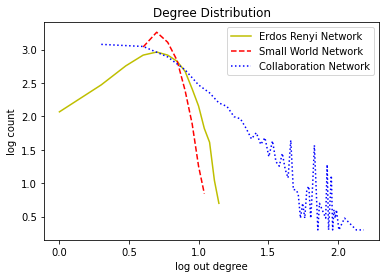

In [24]:
plt.title('Degree Distribution')
plt.plot(*get_log_xy(erdos), color = 'y', label = 'Erdos Renyi Network')
plt.plot(*get_log_xy(small_world), linestyle = 'dashed', color = 'r', label = 'Small World Network')
plt.plot(*get_log_xy(ca_deg), linestyle = 'dotted', color = 'b', label = 'Collaboration Network')
plt.xlabel('log out degree')
plt.ylabel('log count')
plt.legend()

Clustering Coefficient

In [0]:
def cal_coef(n, e):
    adj = defaultdict(set)
    for s1, s2 in e:
        adj[s1].add(s2)
        adj[s2].add(s1)
    C_i = []
    for i in n:
        k = len(adj[i])
        if k > 1:
            e = 0
            for nei in adj[i]:
                e += len(adj[nei])
            C_i.append(2*e / k*(k-1))
    return sum(C_i) / len(n)

In [34]:
cal_coef(*create_Erdos_Renyi_model())

59.33580248760525

In [36]:
cal_coef(*create_small_world_model())

52.59185429539314

In [0]:
ca_node = []
for n in ca.Nodes():
    ca_node.append(n.GetId())

In [0]:
ca_edge = []
for e in ca.Edges():
    ca_edge.append((e.GetSrcNId(), e.GetDstNId(),))

In [47]:
cal_coef(ca_node, ca_edge)

167.1321427787902